In [1]:
import warnings # Omitir mensajes de advertencia
warnings.filterwarnings("ignore")

In [2]:
# Trabajamos en colab:
from google.colab import drive
drive.mount('/content/drive/')

import os

path = '/content/drive/MyDrive/Colab Notebooks/Estadistica_Meteo/' # Directorio de trabajo

os.chdir(path)

Mounted at /content/drive/


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [4]:
df = pd.read_csv('Granja Kcayra.txt', sep=' ')
df

,Año,mes,dia,pp_acum,tmax,tmin
0,1964,1,1,0.0,20.5,8.0
1,1964,1,2,0.0,-99.9,4.5
2,1964,1,3,0.0,-99.9,6.0
3,1964,1,4,0.7,-99.9,6.0
4,1964,1,5,1.2,-99.9,9.1
...,...,...,...,...,...,...
18927,2015,10,27,4.2,17.5,8.2
18928,2015,10,28,5.1,18.2,6.2
18929,2015,10,29,0.0,21.7,5.2
18930,2015,10,30,0.5,21.5,8.2


In [5]:
for columna in df.columns:
    conteo = (df[columna] == -99.9).sum()
    print(f"Número de valores -99.9 en la columna {columna} : {conteo}")

Número de valores -99.9 en la columna Año : 0
Número de valores -99.9 en la columna mes : 0
Número de valores -99.9 en la columna dia : 0
Número de valores -99.9 en la columna pp_acum : 204
Número de valores -99.9 en la columna tmax : 290
Número de valores -99.9 en la columna tmin : 304


In [6]:
df = df.replace(-99.9, np.nan)
df.head()

,Año,mes,dia,pp_acum,tmax,tmin
0,1964,1,1,0.0,20.5,8.0
1,1964,1,2,0.0,NaN,4.5
2,1964,1,3,0.0,NaN,6.0
3,1964,1,4,0.7,NaN,6.0
4,1964,1,5,1.2,NaN,9.1


In [7]:
df['time'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['mes'].astype(str) + '-' + df['dia'].astype(str), format='%Y-%m-%d')
df.head()

,Año,mes,dia,pp_acum,tmax,tmin,time
0,1964,1,1,0.0,20.5,8.0,1964-01-01
1,1964,1,2,0.0,NaN,4.5,1964-01-02
2,1964,1,3,0.0,NaN,6.0,1964-01-03
3,1964,1,4,0.7,NaN,6.0,1964-01-04
4,1964,1,5,1.2,NaN,9.1,1964-01-05


In [8]:
df_copy = df.copy()
df_copy.set_index('time', inplace = True)
df_copy = df_copy.drop(['Año', 'mes', 'dia'], axis = 1)
df_copy.head()

,pp_acum,tmax,tmin
time,,,
1964-01-01,0.0,20.5,8.0
1964-01-02,0.0,NaN,4.5
1964-01-03,0.0,NaN,6.0
1964-01-04,0.7,NaN,6.0
1964-01-05,1.2,NaN,9.1


# TEMPERATURA MÁXIMAS

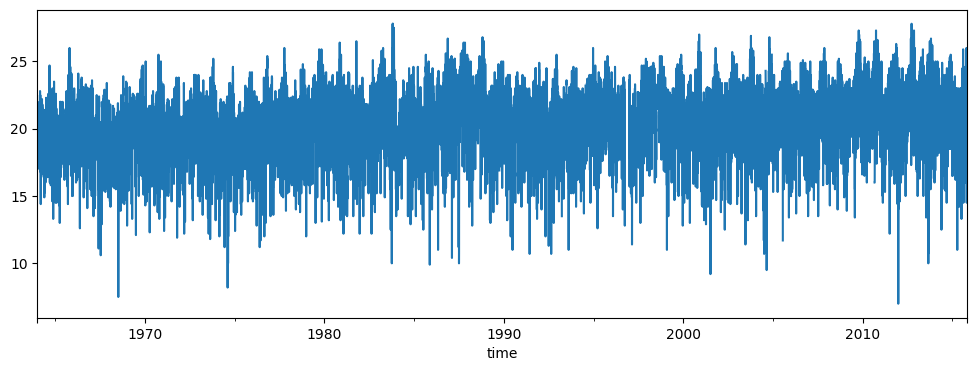

In [40]:
ax = df_copy['tmax'].plot(figsize = (12, 4))

### BOXPLOTS ANUALES

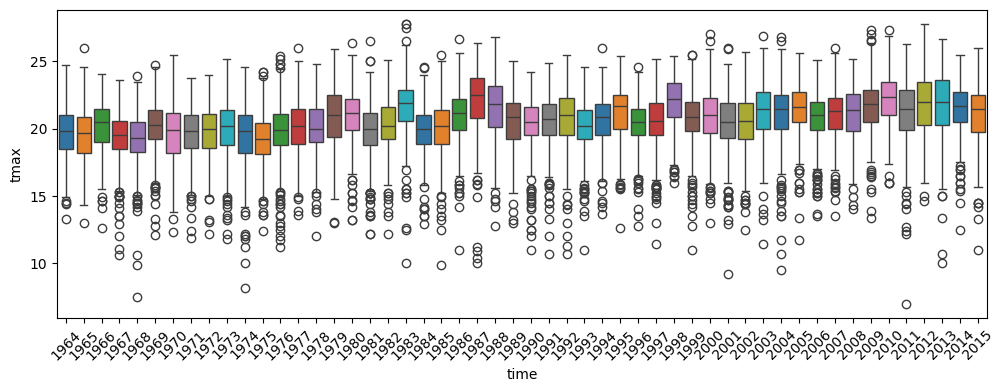

In [39]:
plt.figure(figsize=(12, 4))
ax = sns.boxplot(data=df_copy, x=df_copy.index.year, y='tmax', palette = 'tab10')
plt.xticks(rotation=45)
plt.show()

# BOXPLOTS MENSUALES

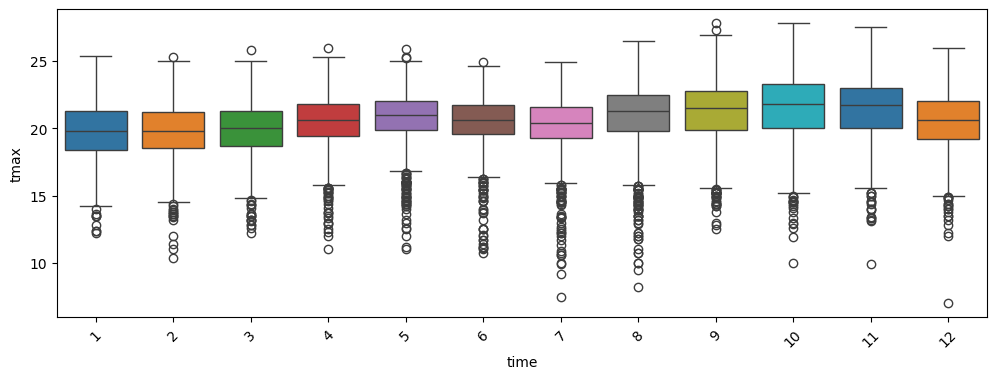

In [42]:
plt.figure(figsize=(12, 4))
ax = sns.boxplot(data=df_copy, x=df_copy.index.month, y='tmax', palette = 'tab10')
plt.xticks(rotation=45)
plt.show()

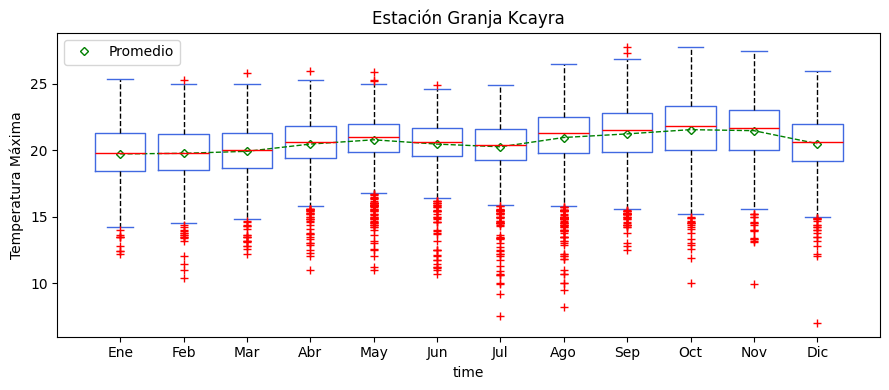

In [47]:
plt.figure(figsize=(9, 4))
sns.boxplot(data=df_copy, x=df_copy.index.month, y='tmax', fill=False, color='royalblue', linewidth = 1,
            whiskerprops=dict(color='black', linestyle='--', linewidth = 1),
            flierprops=dict(marker='+', markerfacecolor='red', markeredgecolor='red'),
            medianprops=dict(color='red'),
            showcaps=dict(color='yellow'))  # Ajuste del color de la línea de la mediana

# Calcular promedios mensuales
promedios = df.groupby(df_copy.index.month)['tmax'].mean()

# Dibujar los rombos de promedio con el contorno verde
plt.plot(promedios.index-1, promedios.values, marker='D', color='none', markeredgecolor='green',
          linestyle='--', markersize=4, label='Promedio')

# Dibujar líneas que conectan los puntos del promedio en rojo
plt.plot(promedios.index-1, promedios.values, color='green', linestyle='--', linewidth=1)
plt.ylabel('Temperatura Máxima')
plt.title(f'Estación Granja Kcayra')
plt.xticks(range(0, 12), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend()
plt.tight_layout()
plt.show()

# PERCENTILES DIARIOS

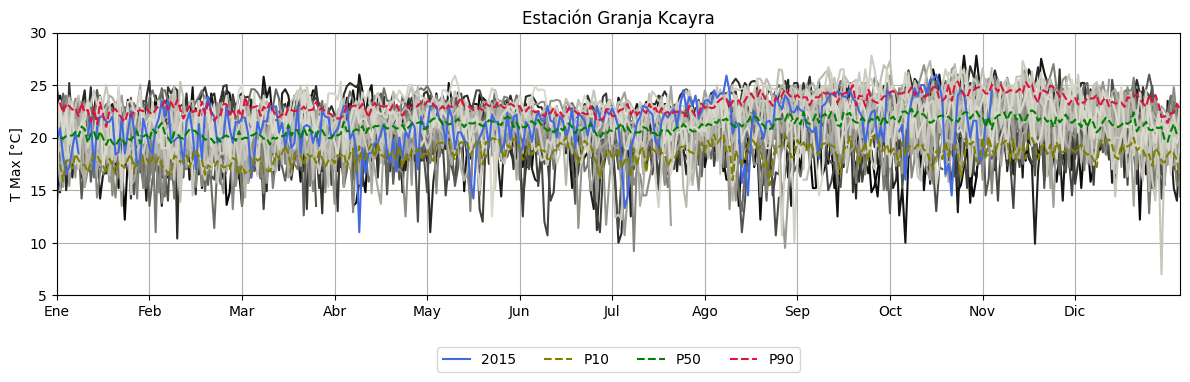

In [133]:
plt.figure(figsize=(12, 4))
# ------------------------------------------------------------------------------
# Período climatológico
data_idx = df_copy.loc['1981':'2010']
# ------------------------------------------------------------------------------
# Calculando los percentiles diarios
P10 = data_idx.groupby(data_idx.index.dayofyear)['tmax'].quantile(q=0.10)
P50 = data_idx.groupby(data_idx.index.dayofyear)['tmax'].quantile(q=0.50)
P90 = data_idx.groupby(data_idx.index.dayofyear)['tmax'].quantile(q=0.90)
# ------------------------------------------------------------------------------
for i in range(1981, 2016):  # Ajuste del rango de años
    data_idx_year = df_copy.loc[str(i)]['tmax'].reset_index(drop=True)
    gray_intensity = (i - 1980) / (2016 - 1980)  # Ajuste para que el año 1981 sea menos oscuro
    gray_color = (gray_intensity * 0.9, gray_intensity * 0.9, gray_intensity * 0.85)  # Escala más suave

    if i == 2015:
        data_idx_year.plot(label='2015', color='royalblue')
    else:
        data_idx_year.plot(color=gray_color, label = None)  # Para todos los demás años, tonos de grises
# ------------------------------------------------------------------------------
plt.plot(P10.index, P10.values, color='olive', linestyle='--', label='P10')
plt.plot(P50.index, P50.values, color='green', linestyle='--', label='P50')
plt.plot(P90.index, P90.values, color='crimson', linestyle='--', label='P90')
# ------------------------------------------------------------------------------
plt.title('Estación Granja Kcayra', fontsize = 12)
plt.ylabel('T Max [°C]', fontsize = 10)
plt.ylim(5, 30)
# ------------------------------------------------------------------------------
plt.xticks(range(0, 360, 30), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.xlim(P10.index.min()-1, P90.index.max()-2)  # Establecer los límites del eje x
# ------------------------------------------------------------------------------
# Ajustar leyendas
handles, labels = plt.gca().get_legend_handles_labels()
filtered_labels = ['2015', 'P10', 'P50', 'P90']
filtered_handles = [handle for i, handle in enumerate(handles) if labels[i] in filtered_labels]
# ------------------------------------------------------------------------------
plt.legend(filtered_handles, filtered_labels, loc='upper center', bbox_to_anchor=(0.5, -0.17), ncol=4)
plt.tight_layout()
plt.grid()
plt.show()

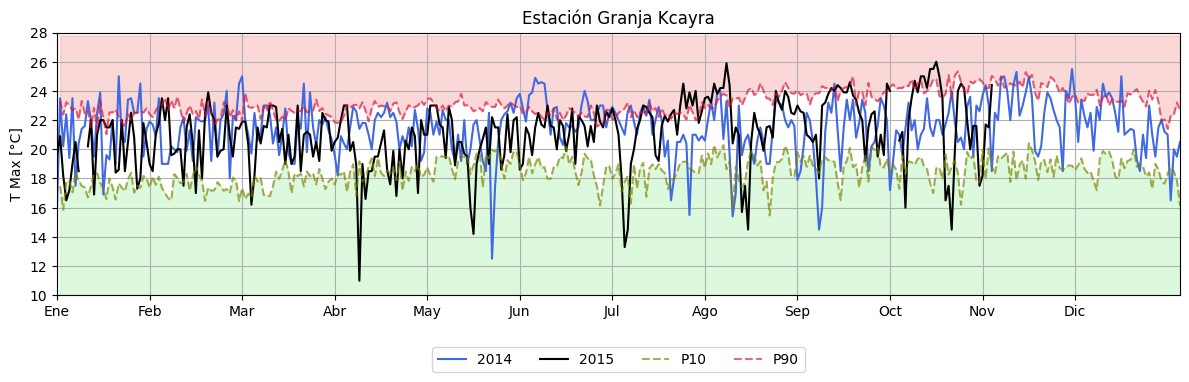

In [134]:
plt.figure(figsize=(12, 4))
# ------------------------------------------------------------------------------
# Período climatológico
data_idx = df_copy.loc['1981':'2010']
# ------------------------------------------------------------------------------
# Calcula los percentiles
P10 = data_idx.groupby(data_idx.index.dayofyear)['tmax'].quantile(q=0.10)
P90 = data_idx.groupby(data_idx.index.dayofyear)['tmax'].quantile(q=0.90)
# ------------------------------------------------------------------------------
# Graficar los datos originales y el percentil calculado
for i in range(1981, 2016):
    data_idx_year = df_copy.loc[str(i)]['tmax'].reset_index(drop=True)
    # Graficar los datos originales para el año 2023 en azul
    if i == 2014:
        data_idx_year.plot(color='royalblue', label='2014')
    if i == 2015:
        data_idx_year.plot(color='black', label='2015', linewidth = 1.5)
# ------------------------------------------------------------------------------
plt.plot(P10.index, P10.values, color='olive', linestyle='--', label='P10', alpha=0.65)
plt.plot(P90.index, P90.values, color='crimson', linestyle='--', label='P90', alpha=0.65)
# ------------------------------------------------------------------------------
# Colorear áreas debajo del P10 y arriba del P90
plt.fill_between(P10.index, P10, color='lightgreen', alpha=0.3)
plt.fill_between(P90.index, P90, max(data_idx['tmax']), color='lightcoral', alpha=0.3)
# ------------------------------------------------------------------------------
plt.title('Estación Granja Kcayra', fontsize = 12)
plt.ylabel('T Max [°C]', fontsize = 10)
plt.ylim(10, 28)
# ------------------------------------------------------------------------------
plt.xticks(range(0, 360, 30), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.xlim(P10.index.min()-1, P90.index.max()-2)  # Establecer los límites del eje x
# ------------------------------------------------------------------------------
# Ajustar leyendas
handles, labels = plt.gca().get_legend_handles_labels()
filtered_labels = ['2014', '2015', 'P10', 'P90']
filtered_handles = [handle for i, handle in enumerate(handles) if labels[i] in filtered_labels]
# ------------------------------------------------------------------------------
plt.legend(filtered_handles, filtered_labels, loc='upper center', bbox_to_anchor=(0.5, -0.17), ncol=4)
plt.tight_layout()
plt.grid()
plt.show()